In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random

### An example of a 2-d random walk

Mariastenchia was in urgent need to use the restroom. Luckly, she saw Murphy's pub open and decided to go in for  relief. 

Unfortunately, Mariastenchia is not feeling very well, and due to some unknown reasons, she is confused and dizzy, and hence not sure if she can make it to the bathroom. After a quick evaluation, she decided that if she cannot get there in less than 300 steps, she will be in serious trouble.

Do you think she can make a successful trip to the restroom? Let's help her estimating her odds.

![](murphy2.jpg)


 The helper function below plots the floor plan.

In [2]:
# Helper function to draw the floor plan
# You should not modify anything here
def draw_murphy(wc,person,room_size):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)
    plt.xlim(0,room_size)
    plt.ylim(0,room_size)
    plt.xlabel("X Position")
    plt.ylabel("Y Position");
    ax.set_aspect('equal')
    
    rect = plt.Rectangle(wc[:2], wc[-1], wc[-1], color=(0.6,0.2,0.1) )
    ax.add_patch(rect)
    plt.text(wc[0],wc[1]+wc[2]+0.2,"WC")

    rect = plt.Rectangle((0,0),2,0.1, color=(0,0,1) )
    ax.add_patch(rect)
    plt.text(0.5,0.2,"door")
   
    circle = plt.Circle(person[:2], 0.3, color=(1,0,0))
    ax.add_patch(circle)

#### Let's take a look at the floor plan of Murphy's pub

We will simplify the floor plan with a square domain of size `room_size = 10`. The bottom left corner of the room will be used as the origin, i.e. the position `(x,y) = (0,0)`.

The bathroom location is indicated by a square, with the left bottom corner located at `(8,8)` and dimension `h = 1`. These quantities are stored as a tuple `bathroom = (8,8,1)`.

 The street door is located at the bottom half, indicated by the blue line. Mariastenchia initial position is given by `initial_position = (1,1)`, marked with a red half-dot.

In [3]:
room_size = 10
bathroom = (8,8,1) 
initial_position = (1,1)

We will simplify Mariastenchia's challenge and remove all the tables and the bar area inside Murphy's. Here is how the room looks like in our simplified floor plan (you can go crazy later and improve the layout!)

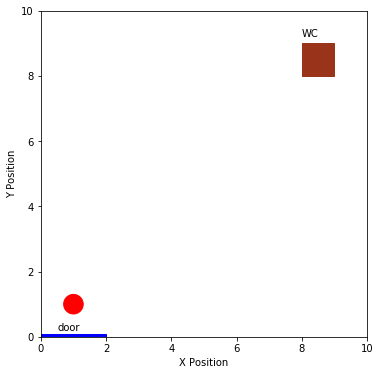

In [4]:
draw_murphy(bathroom,initial_position,room_size)

#### How are we going to model Mariastenchia's walk?

- Since Mariastenchia is dizzy and confused, we will model her steps as a random walk. 

- Each step will be modeled by a magnitude and direction in a 2d plane. We will assume the magnitude as 1.

- The direction is given by a random angle $\alpha$ between $0$ and $2\pi$.

- Combining the angle and magnitude, her step is defined as:

$$ step = [\cos(\alpha), \sin(\alpha)]$$



Write the function `random_step` that takes as argument the current position, and returns the new position based on a random step with orientation $\alpha$.

In [5]:
def random_step(current_position):
    
    new_position = current_position.copy() 
    
    # complete this function here
    
    #clear
    theta = random.randint(0,360)    
    new_position[0] += np.cos(theta*np.pi/180)    
    new_position[1] += np.sin(theta*np.pi/180)
    #clear
    
    return(new_position)

Let's make Mariastenchia give her 300 steps, using the function `random_step`. Update the list `position` to include all the random steps that she takes as she tries to reach the batthroom. 

In [6]:
N = 300
position = [list(initial_position)]

In [7]:
for i in range(N-1):
    # complete this code snippet
    #clear
    new_position = random_step(position[-1])
    position.append(new_position)

Plot her path from the door (given by the variable `initial_position` above) to her final location. Did she reach the bathroom?

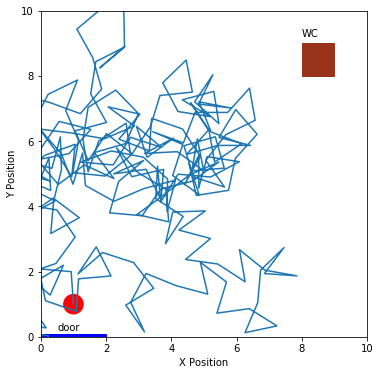

In [11]:
draw_murphy(bathroom,initial_position,room_size)
x,y = zip(*position)
plt.plot(x,y)

You probably noticed Mariastenchia hitting walls, or even walking through them! Let's make sure we impose this constraints to the random walk, so we can get some feasible solution. Here are the rules for Mariastenchia's walk:

- If Mariastenchia runs into a wall, the simulation stops, and we call it a "failure" (ops!)
- If the sequence of steps takes Mariastenchia to the restroom, the simulation stops, and we call it a success (yay!).
- To simplify the problem, the "restroom" does not have a door, and Mariastenchia can "enter" the square through any of its sides.
- Mariastenchia needs to reach the restroom in less than 100 steps, otherwise the simulation stops (at this point, it is a little too late for her...). This is also called a failure.

The function `check_rules` checks if the `new_position` is a valid one, according to the rules above. The function returns `0` if the `new_position` is a valid step (still inside Murphy's and searching for the restroom), `1` if `new_position` is inside the restroom (sucess), and `-1` if `new_position` is a failure (Mariastenchia became a super woman and crossed a wall)

In [12]:
def check_rules(room_size,wc,current_position):
    x,y,h = wc
    # Checking if inside the room:
    if ( (current_position[0] > 0) & (current_position[0] < room_size) & (current_position[1] > 0) & (current_position[1] < room_size)):
        # Checking if found the restroom
        if ( (current_position[0] > x) & (current_position[0] < x + h) & (current_position[1] > y) & (current_position[1] < y + h)):
            return 1 
        else:
            return 0
    else:
        return (-1)

Modify the code snippet below, so that for every step, you check for the constraints using `check_rules`. Instead of giving all the 300 steps, you should stop earlier in case she reaches the restroom (`check_rules == 1`) or she hits a wall ( `check_rules == -1`). Store her walk in a new array `position_constrained`

In [19]:
N = 300
position_constrained = [list(initial_position)]

for i in range(N-1):
    
    # complete the code snippet
    #clear
    new_position = random_step(position_constrained[-1])
    position_constrained.append(new_position)   

    result = check_rules(room_size,bathroom,new_position)
    if result == 1:
        # found the wc
        break
    elif result == -1:
        # hit a wall
        break


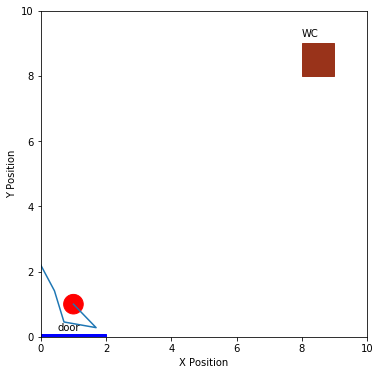

In [20]:
draw_murphy(bathroom,initial_position,room_size)  
x,y = zip(*position_constrained)
plt.plot(x,y)

It looks like this random walk does not give her much of a chance to get to the restroom. She may need more steps, or we can modify her walk to be a little less random. All you need to do is to modify your function `random_step`. What about we make her move forwards (in the positive direction of y) with a 70% probability (meaning she would move backwards with 30% probability). 

Create a new function `random_step_prob` similar to `random_step` such that there is more chance that Mariastenchia will be moving towards the bathroom.

In [21]:
def random_step_prob(current_position):
    new_position = current_position.copy()
    
    # complete this function here
    
    #clear
    if random.random() > 0.3:
        theta = random.randint(0,180)
    else:
        theta = random.randint(180,360)

    new_position[0] += np.sin(theta*np.pi/180)
    new_position[1] += np.cos(theta*np.pi/180)
    #clear
    return(new_position)

#### Let's estimate the probability Mariastenchia reaches the restroom:

You should now run many simulations (one attempt to reach the restroom), and tally how many attempts are successful. The probability to reach the bathroom is `n_success/M`. Complete the code below:


probability is  0.01751


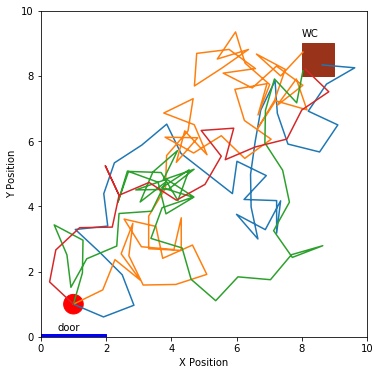

In [22]:
success = 0
track_paths = []

M = 100000
N = 300

for i in range(M):

    position = [list(initial_position)]    

    # Perform One numerical experiment to check if successful trip to restroom or not
    # Write your code snippet here to define "result"
    #clear
    for j in range(N):
        new_position = random_step_prob(position[-1])
        position.append(new_position)
        result = check_rules(room_size,bathroom,new_position)
        if result == 1:
            # found the wc
            success += 1
            break
        elif result == -1:
            # hit a wall
            break
    #clear
            
    if ((result == 1) & (not i%(M/100))):
        track_paths.append(position)
            

draw_murphy(bathroom,initial_position,room_size)  
for l in range(len(track_paths)):
    x,y = zip(*track_paths[l])
    plt.plot(x,y)

print("probability is ", success/M)